# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [8]:
pip install palmerpenguins

In [27]:
import pandas as pd
from palmerpenguins import load_penguins

In [28]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins_dummies = pd.get_dummies(penguins, columns=['island', 'sex'], drop_first=True)
penguins_dummies.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Dream,island_Torgersen,sex_male
0,Adelie,39.1,18.7,181.0,3750.0,2007,0,1,1
1,Adelie,39.5,17.4,186.0,3800.0,2007,0,1,0
2,Adelie,40.3,18.0,195.0,3250.0,2007,0,1,0
4,Adelie,36.7,19.3,193.0,3450.0,2007,0,1,0
5,Adelie,39.3,20.6,190.0,3650.0,2007,0,1,1


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

X = penguins_dummies.drop('species', axis=1)
y = penguins_dummies['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

knn1 = KNeighborsClassifier(n_neighbors=3)
knn2 = KNeighborsClassifier(n_neighbors=5)
tree1 = DecisionTreeClassifier(max_depth=3)
tree2 = DecisionTreeClassifier(max_depth=5)

models = [knn1, knn2, tree1, tree2]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

print(f"Model: {model}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Model: DecisionTreeClassifier(max_depth=5)
Confusion Matrix:
 [[44  0  0]
 [ 0 20  0]
 [ 2  0 34]]
Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        44
   Chinstrap       1.00      1.00      1.00        20
      Gentoo       1.00      0.94      0.97        36

    accuracy                           0.98       100
   macro avg       0.99      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [30]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label='species_of_choice')
roc_auc = auc(fpr, tpr)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


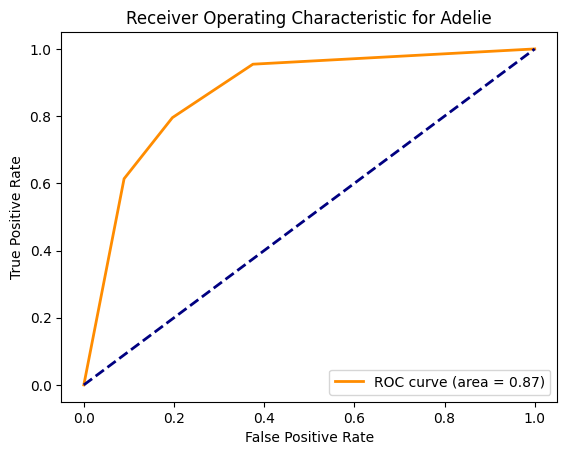

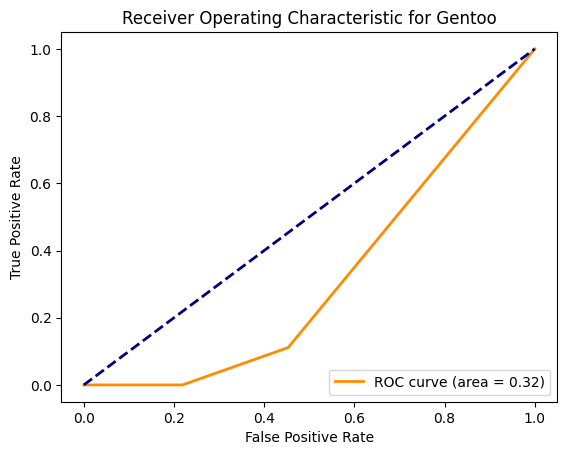

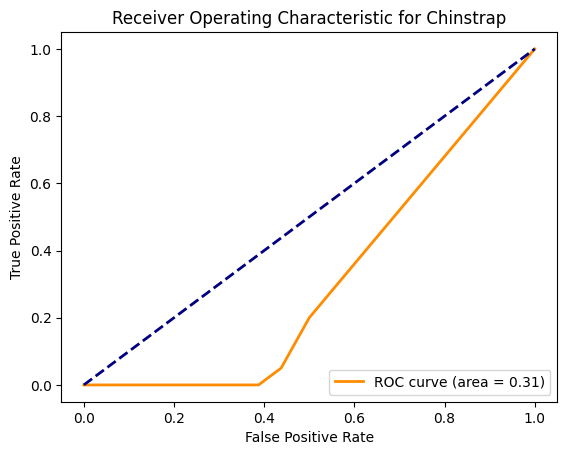

In [32]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

y_bin = label_binarize(y, classes=y.unique())
n_classes = y_bin.shape[1]
y_test_bin = label_binarize(y_test, classes=y.unique())

# Compute ROC curve and ROC area for each class
model = models[0]  # Replace with your model
y_score = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {y.unique()[i]}')
    plt.legend(loc="lower right")
    plt.show()